#  Correction — Devoir : Découverte du dataset Titanic

Ce notebook fournit une proposition de **correction détaillée** pour le devoir d'introduction à l'analyse de données avec le dataset **Titanic**.

---


## 1️⃣ Import des bibliothèques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Bibliothèques importées.")

Bibliothèques importées.


## 2️⃣ Chargement du dataset Titanic

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3️⃣ Structure du DataFrame

### ✔ Q1 — Combien y a-t-il de lignes et de colonnes ?

In [5]:
df.shape

(891, 12)

**Interprétation :** Le dataset contient **891 lignes** (passagers) et **12 colonnes** (variables / features).

### ✔ Q2 — Liste des colonnes

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Les colonnes sont :

- `PassengerId`
- `Survived`
- `Pclass`
- `Name`
- `Sex`
- `Age`
- `SibSp`
- `Parch`
- `Ticket`
- `Fare`
- `Cabin`
- `Embarked`

**Variables importantes possibles :**  
- `Survived` (variable cible)  
- `Pclass`, `Sex`, `Age`, `Fare`, `Embarked` (variables explicatives intéressantes)


### ✔ Q3 — Types de données (`dtypes`)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Exemples :

- **Numériques** : `Age`, `Fare`, `SibSp`, `Parch`  
- **Catégorielles (object)** : `Sex`, `Embarked`, `Cabin`, `Name`, `Ticket`


### ✔ Q4 — Résumé du DataFrame (`df.info()`)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



On observe que certaines colonnes contiennent des valeurs manquantes, notamment :

- `Age`
- `Cabin`
- `Embarked`


## 4️⃣ Analyse descriptive

### ✔ Q5 — Statistiques descriptives (`df.describe()`)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Points clés (valeurs approximatives) :

- Âge moyen (`Age`) ≈ 29.7 ans  
- Prix moyen du billet (`Fare`) ≈ 32.2  
- Âge minimum ≈ 0.42  
- Âge maximum = 80  


### ✔ Q6 — Combien de passagers ont survécu ?

In [10]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64


Résultat typique :

- `0` : 549 (n'ont pas survécu)  
- `1` : 342 (ont survécu)  

Soit environ **38 % de survivants**.


### ✔ Q7 — Répartition des passagers par classe (`Pclass`)

In [11]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Résultat typique :

- 3e classe : 491 passagers  
- 1ère classe : 216 passagers  
- 2e classe : 184 passagers  

La **3e classe** est la plus représentée.


## 5️⃣ Visualisations

### ✔ Q8 — Graphique : nombre de passagers par classe

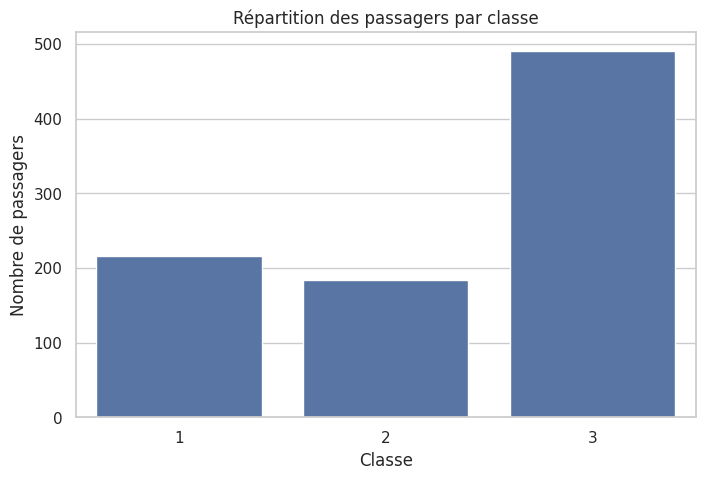

In [12]:
sns.countplot(data=df, x="Pclass")
plt.title("Répartition des passagers par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()


On visualise clairement que la **3e classe** contient le plus grand nombre de passagers.


### ✔ Q9 — Histogramme des âges

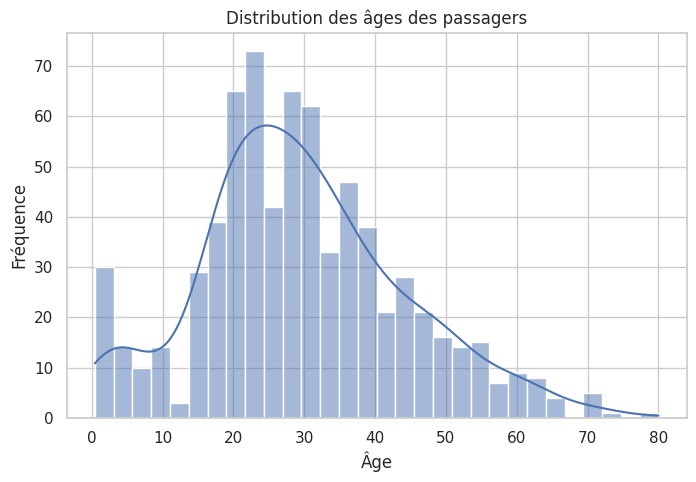

In [13]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


La distribution est concentrée entre **20 et 40 ans**, avec quelques valeurs extrêmes (enfants très jeunes, personnes âgées).


## 6️⃣ Exemple de mini-analyse rédigée


Un exemple de réponse possible :

- Le dataset contient 891 passagers et 12 colonnes.  
- La majorité des passagers voyagent en 3e classe, puis en 1ère et 2e classe.  
- L’âge moyen des passagers est d’environ 30 ans, mais il y a une grande diversité d’âges, de moins d’un an à 80 ans.  
- Le taux de survie global est d’environ 38 %, ce qui montre que la plupart des passagers n’ont pas survécu au naufrage.  
- Plusieurs colonnes, comme `Cabin` et `Age`, contiennent des valeurs manquantes, ce qui aura un impact sur les étapes de préparation des données.  


## ⭐ Bonus — Corrections

### ✔ B1 — Taux de survie (en %)

In [14]:
survival_rate = df["Survived"].mean() * 100
survival_rate

np.float64(38.38383838383838)

Le taux de survie est d’environ **38 %**.

### ✔ B2 — Âge moyen par classe (`Pclass`)

In [15]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


On remarque par exemple que :  
- les passagers de **1ère classe** sont en moyenne plus âgés que ceux de 2e et 3e classe.


### ✔ B3 — Survie selon le sexe

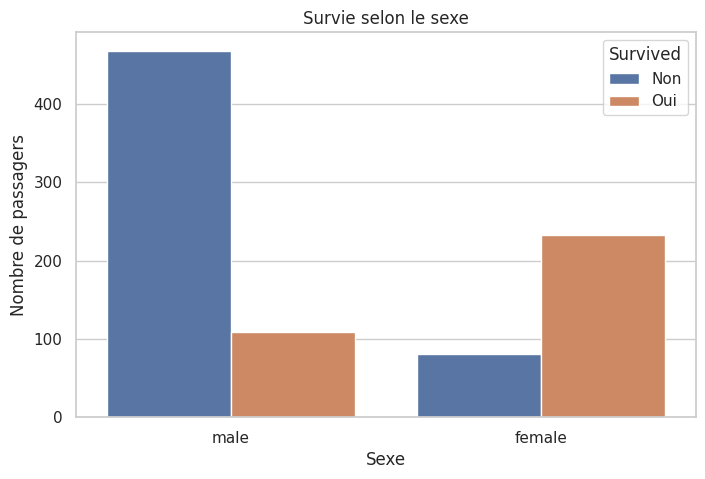

In [16]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survie selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survived", labels=["Non", "Oui"])
plt.show()


Observation : les femmes ont un taux de survie bien plus élevé que les hommes, ce qui reflète la règle "women and children first" appliquée au moment du naufrage.


---

🎉 Fin de la correction du devoir Titanic.

Ce notebook peut servir de support de correction détaillé, ou de base pour aller plus loin vers un premier modèle de Machine Learning (prédiction de `Survived`).